# <span style='color:black'> SVC on wine and SVR on Grad Admission </span>

**<span style='color:red'> 1. EDA, FE and Support Vector Classifier Model (Wine Dataset)</span>**

**<span style='color:red'> 2. EDA, FE and Support Vector Regressor Model (Grad Admission Dataset)</span>**

**Follow me on Linkedin: https://www.linkedin.com/in/nilam-kale-820a5279/**

**Follow me on GitHub: https://github.com/kalenilam27**

**<span style='color:blue'> 1. EDA and FE for both dataset </span>**

1.Data Profiling

2.Statistical analysis

3.Graphical Analysis

4.Data Scaling

**<span style='color:blue'> 2. SVC on Wine Dataset </span>**

1.SVC Model

2.Performance metrics for above model

3.Performance improvement using GridSearchCV

**<span style='color:blue'>  3. SVR on Graduation Admission Dataset </span>**

1.SVR Model

2.Performance metrics for above model

**Wine Dataset: https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv**

**Grad Admission Dataset: https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv**

# <span style='color:red'> 1.0 Importing required libraries </span>

In [3]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,r2_score

### To save the model
import pickle

### To be able to see maximum columns on screen
pd.set_option('display.max_columns',500)


# <span style='color:red'> 2.0 Support Vector Classifier for Wine Dataset </span>

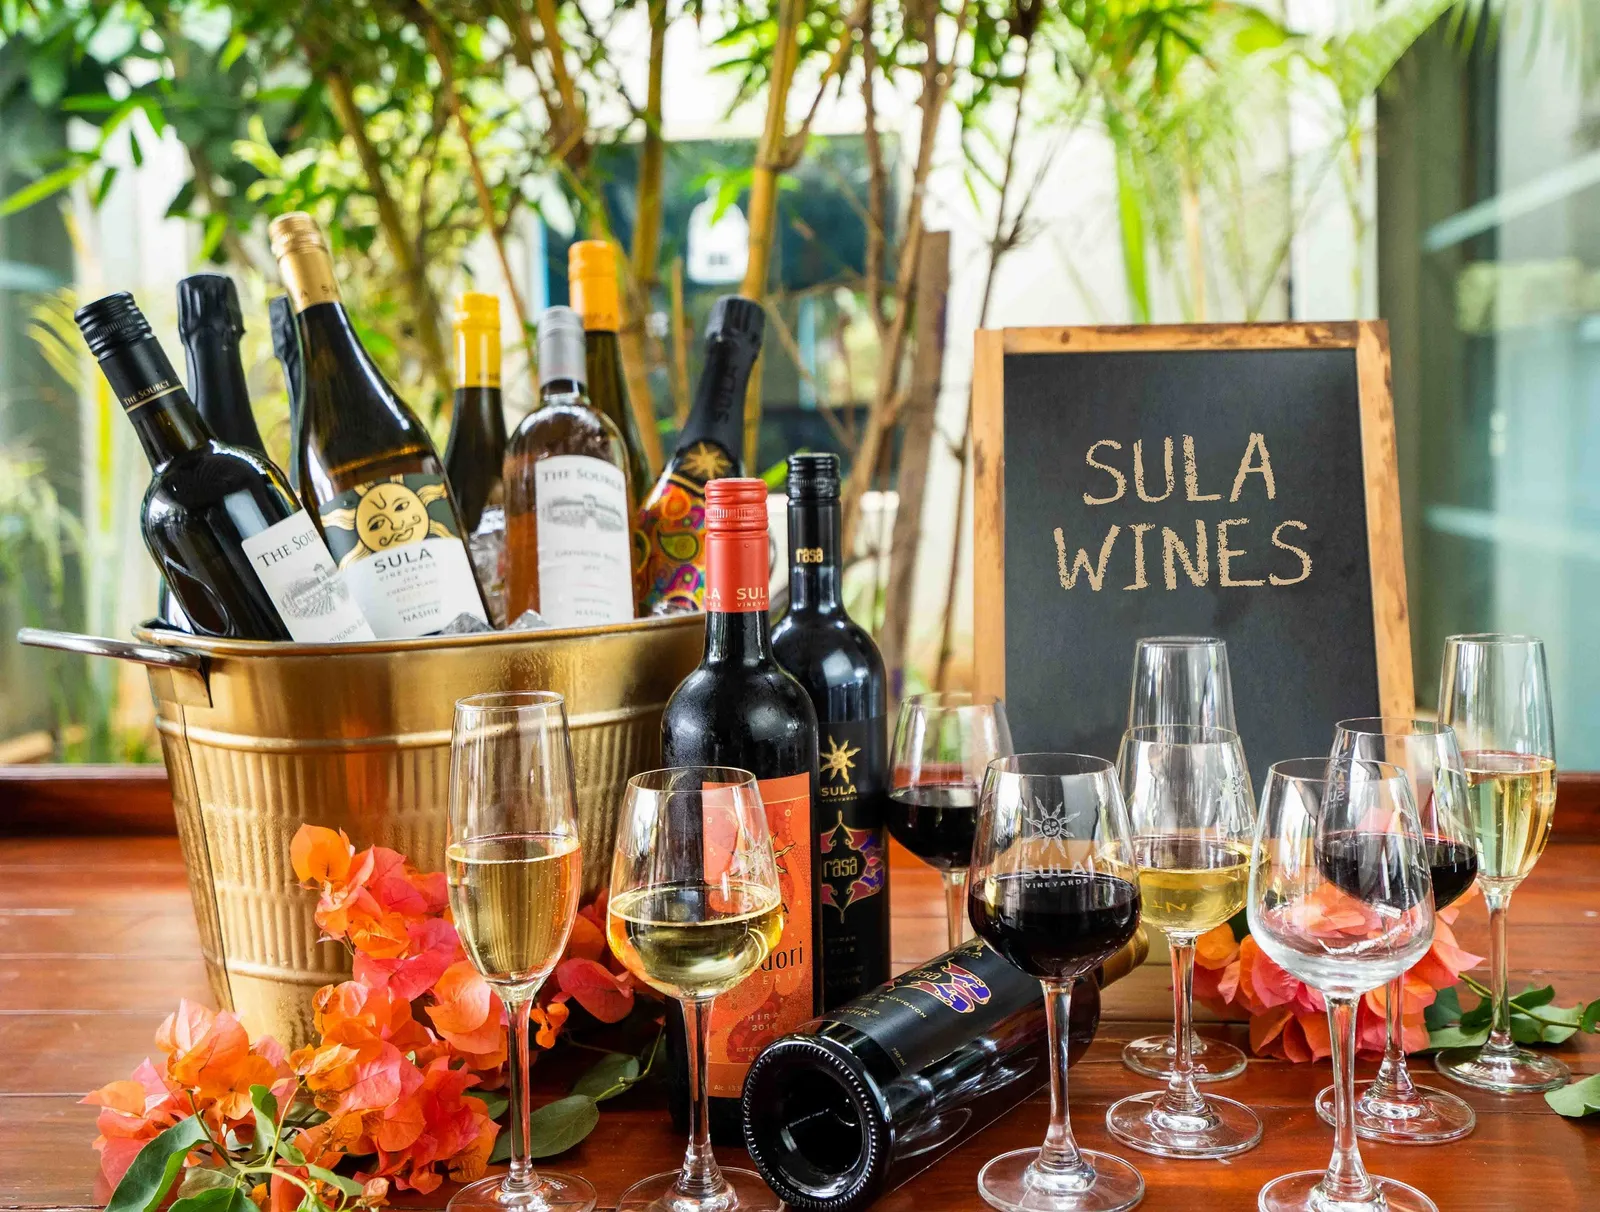

In [4]:
from IPython import display
display.Image('desktop/Datasets/image.png')

# <span style='color:red'> 2.1 Importing Wine Dataset and doing statistical analysis </span>

In [5]:
dataset=pd.read_csv('Desktop/Datasets/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
### getting unique values for quality feature
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
### getting count of record for each unique value in quality
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
# getting null values and datatypes of all features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
### getting info about numerical features
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [11]:
### getting null values in each feature
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# <span style='color:red'> 2.2 Visualising Numerical data </span>

In [12]:
### getting list of numerical features
Numerical_features= [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
print(Numerical_features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [16]:
### getting count of unique value in each feature
for feature in Numerical_features:
    print("'{}' has '{}' unique values".format(feature,dataset[feature].nunique()))

'fixed acidity' has '96' unique values
'volatile acidity' has '143' unique values
'citric acid' has '80' unique values
'residual sugar' has '91' unique values
'chlorides' has '153' unique values
'free sulfur dioxide' has '60' unique values
'total sulfur dioxide' has '144' unique values
'density' has '436' unique values
'pH' has '89' unique values
'sulphates' has '96' unique values
'alcohol' has '65' unique values
'quality' has '6' unique values


In [17]:
continuous_features= [feature for feature in Numerical_features if dataset[feature].nunique()>6]
print(continuous_features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


<AxesSubplot:xlabel='quality', ylabel='count'>

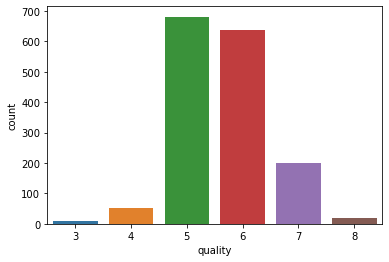

In [18]:
### visualising count of quality feature
sns.countplot(data=dataset,x='quality')

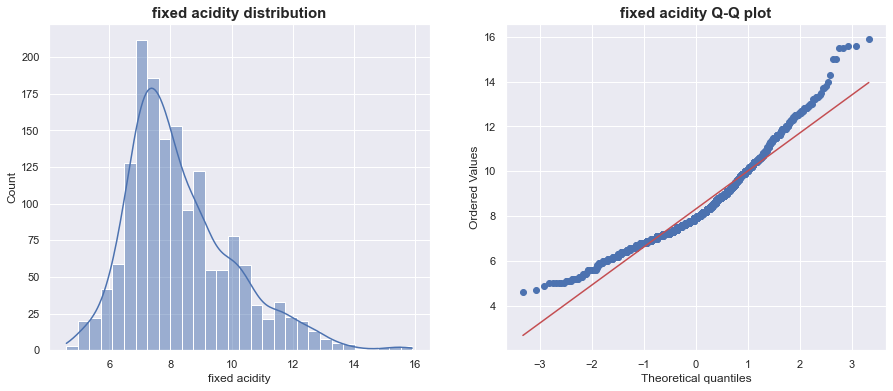

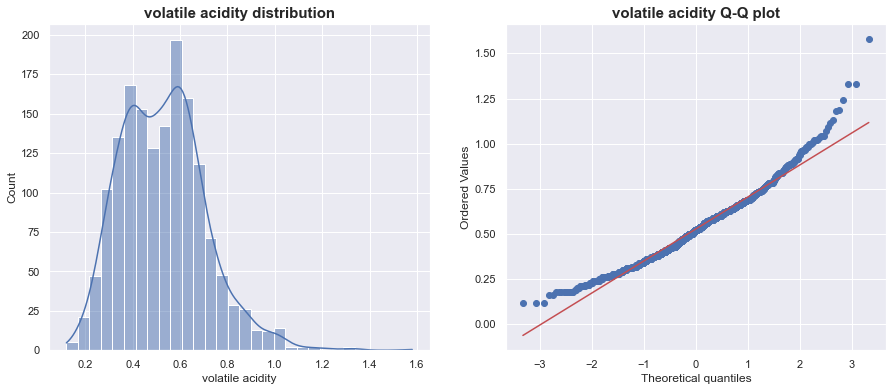

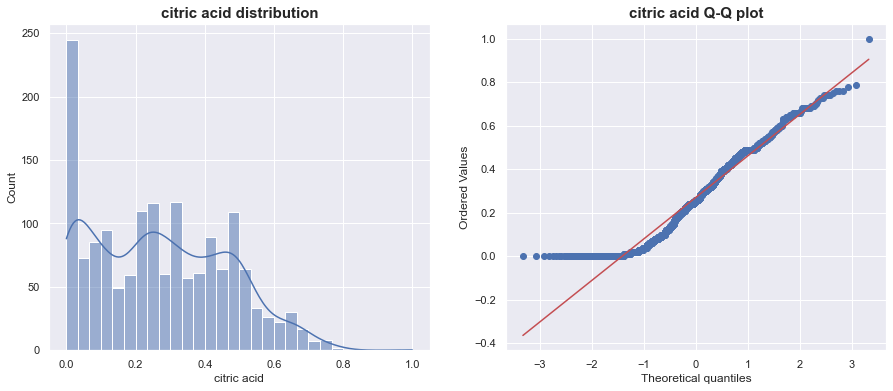

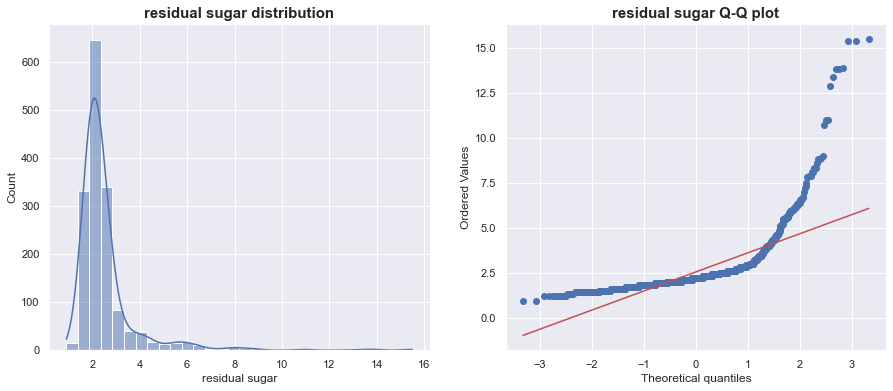

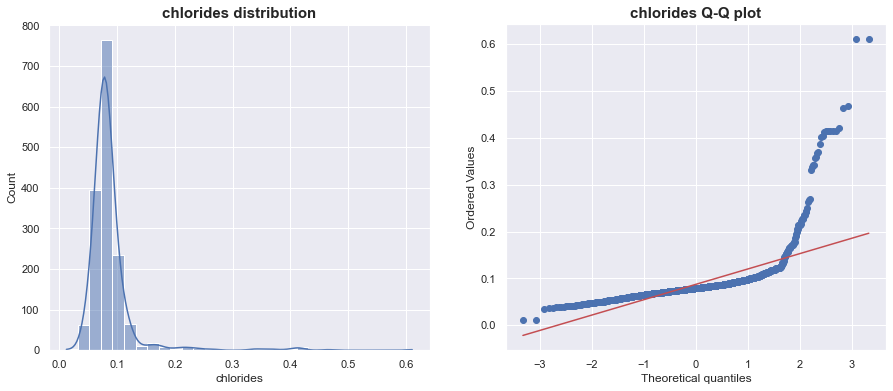

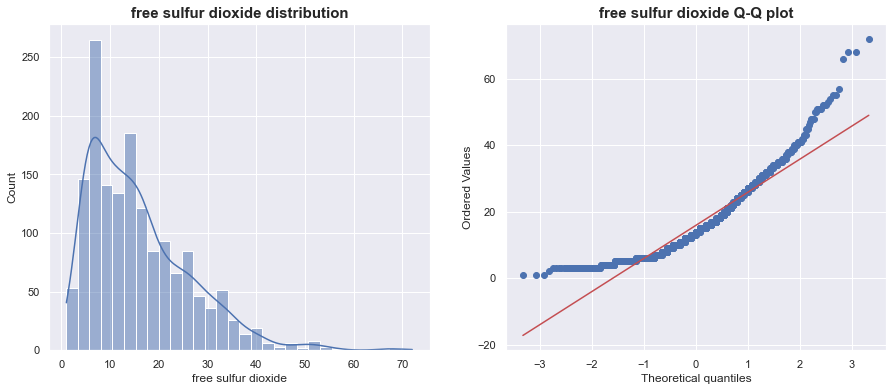

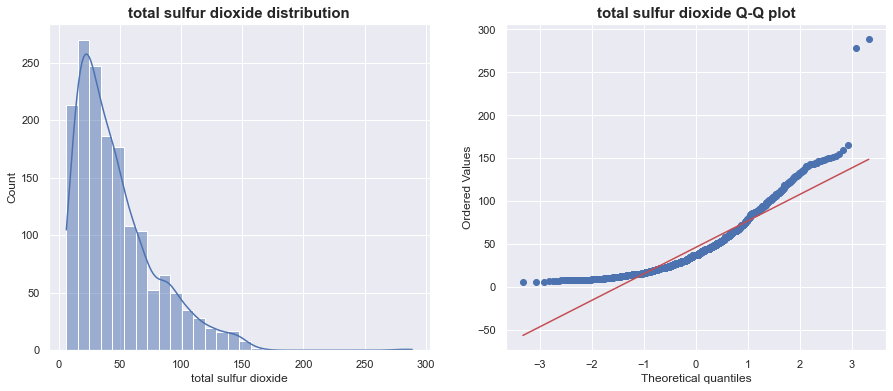

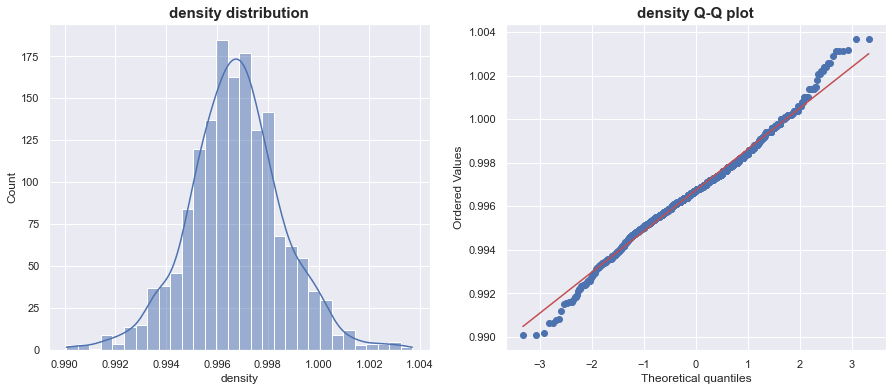

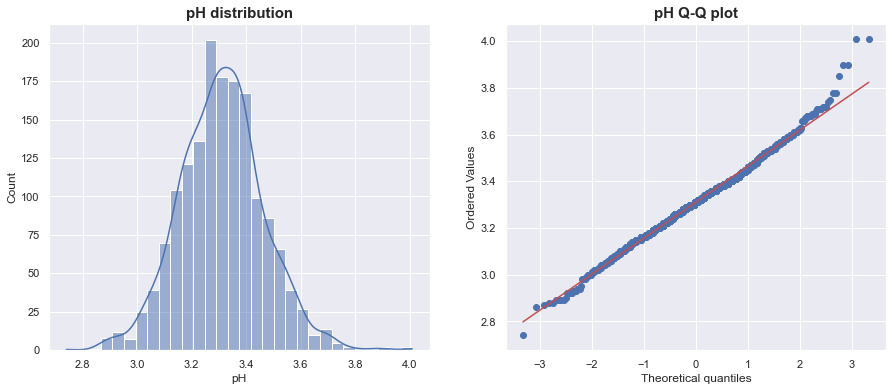

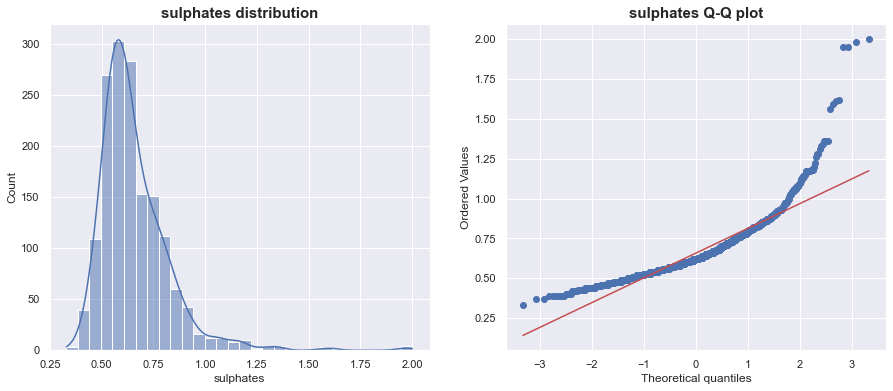

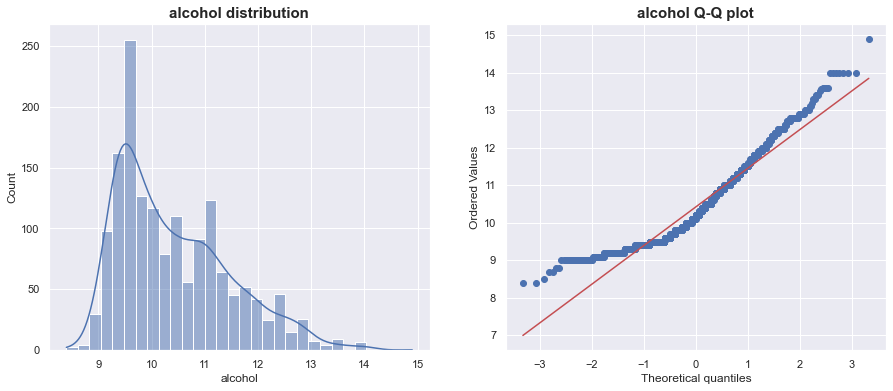

In [27]:
### Checking distribution of Continuous numerical features

for feature in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=dataset,x=feature,kde=True,bins=30)
    plt.title('{} distribution'.format(feature),fontsize=15,fontweight='bold')
    
    plt.subplot(122)
    stats.probplot(dataset[feature],dist='norm',plot=plt)
    plt.title('{} Q-Q plot'.format(feature),fontsize=15,fontweight='bold')
    plt.show();

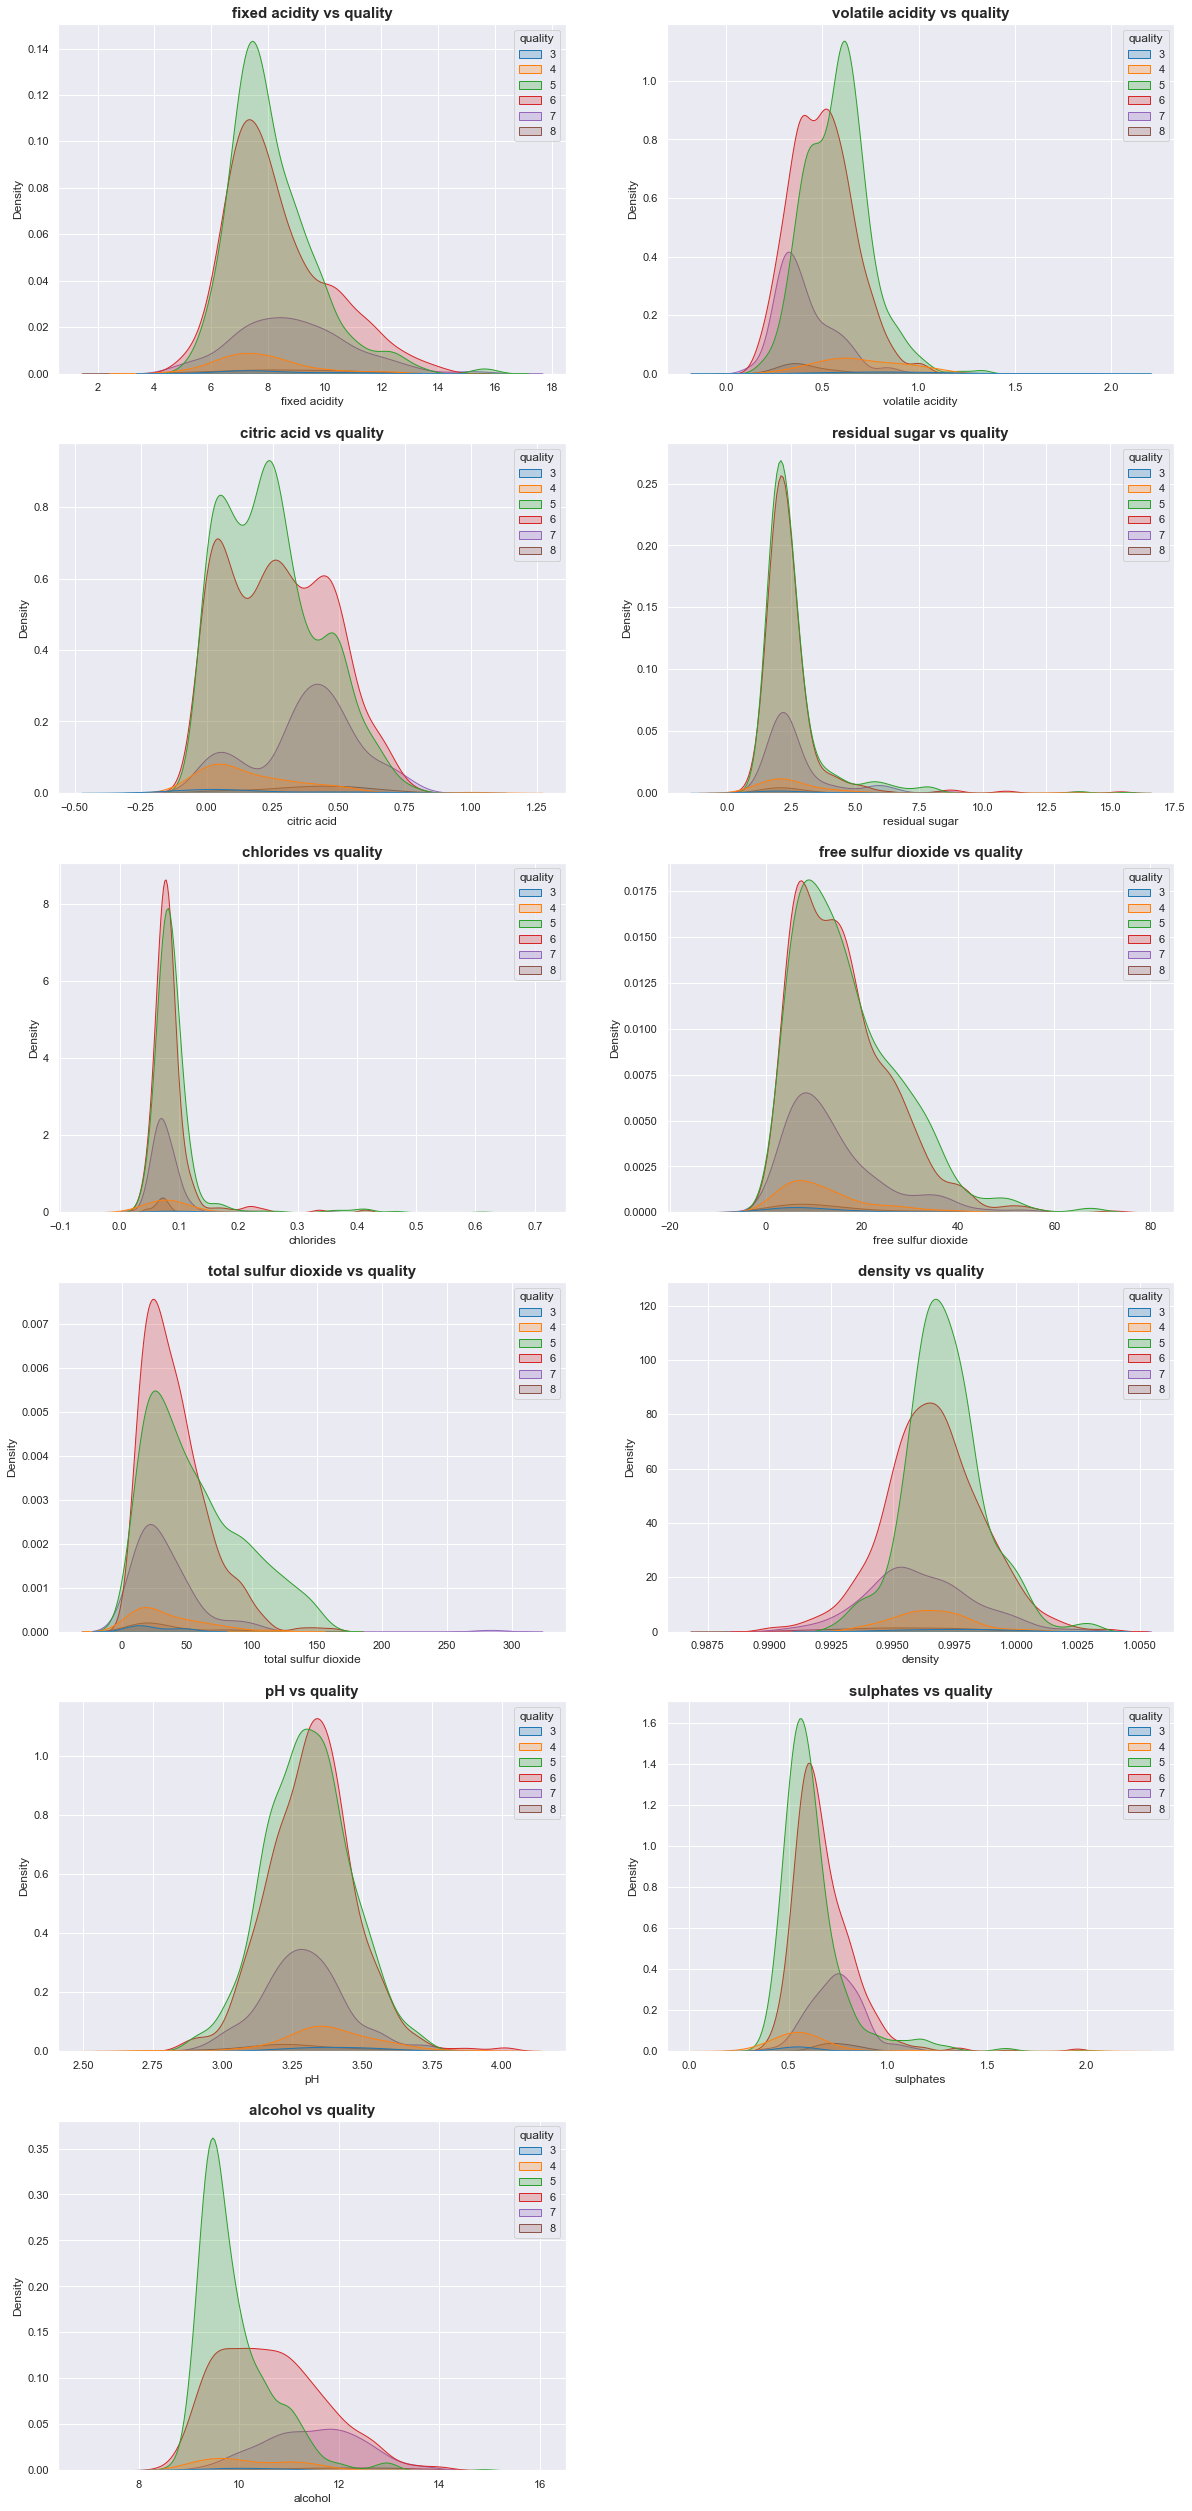

In [32]:
### Comparing Continuous numerical features with quality feature
palette1=sns.color_palette('tab10',6)
plt.figure(figsize=(20,45))
for feature in enumerate(continuous_features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(8,7)})
    sns.kdeplot(data=dataset,x=feature[1],palette=palette1,hue='quality',fill=True)
    plt.title('{} vs quality'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

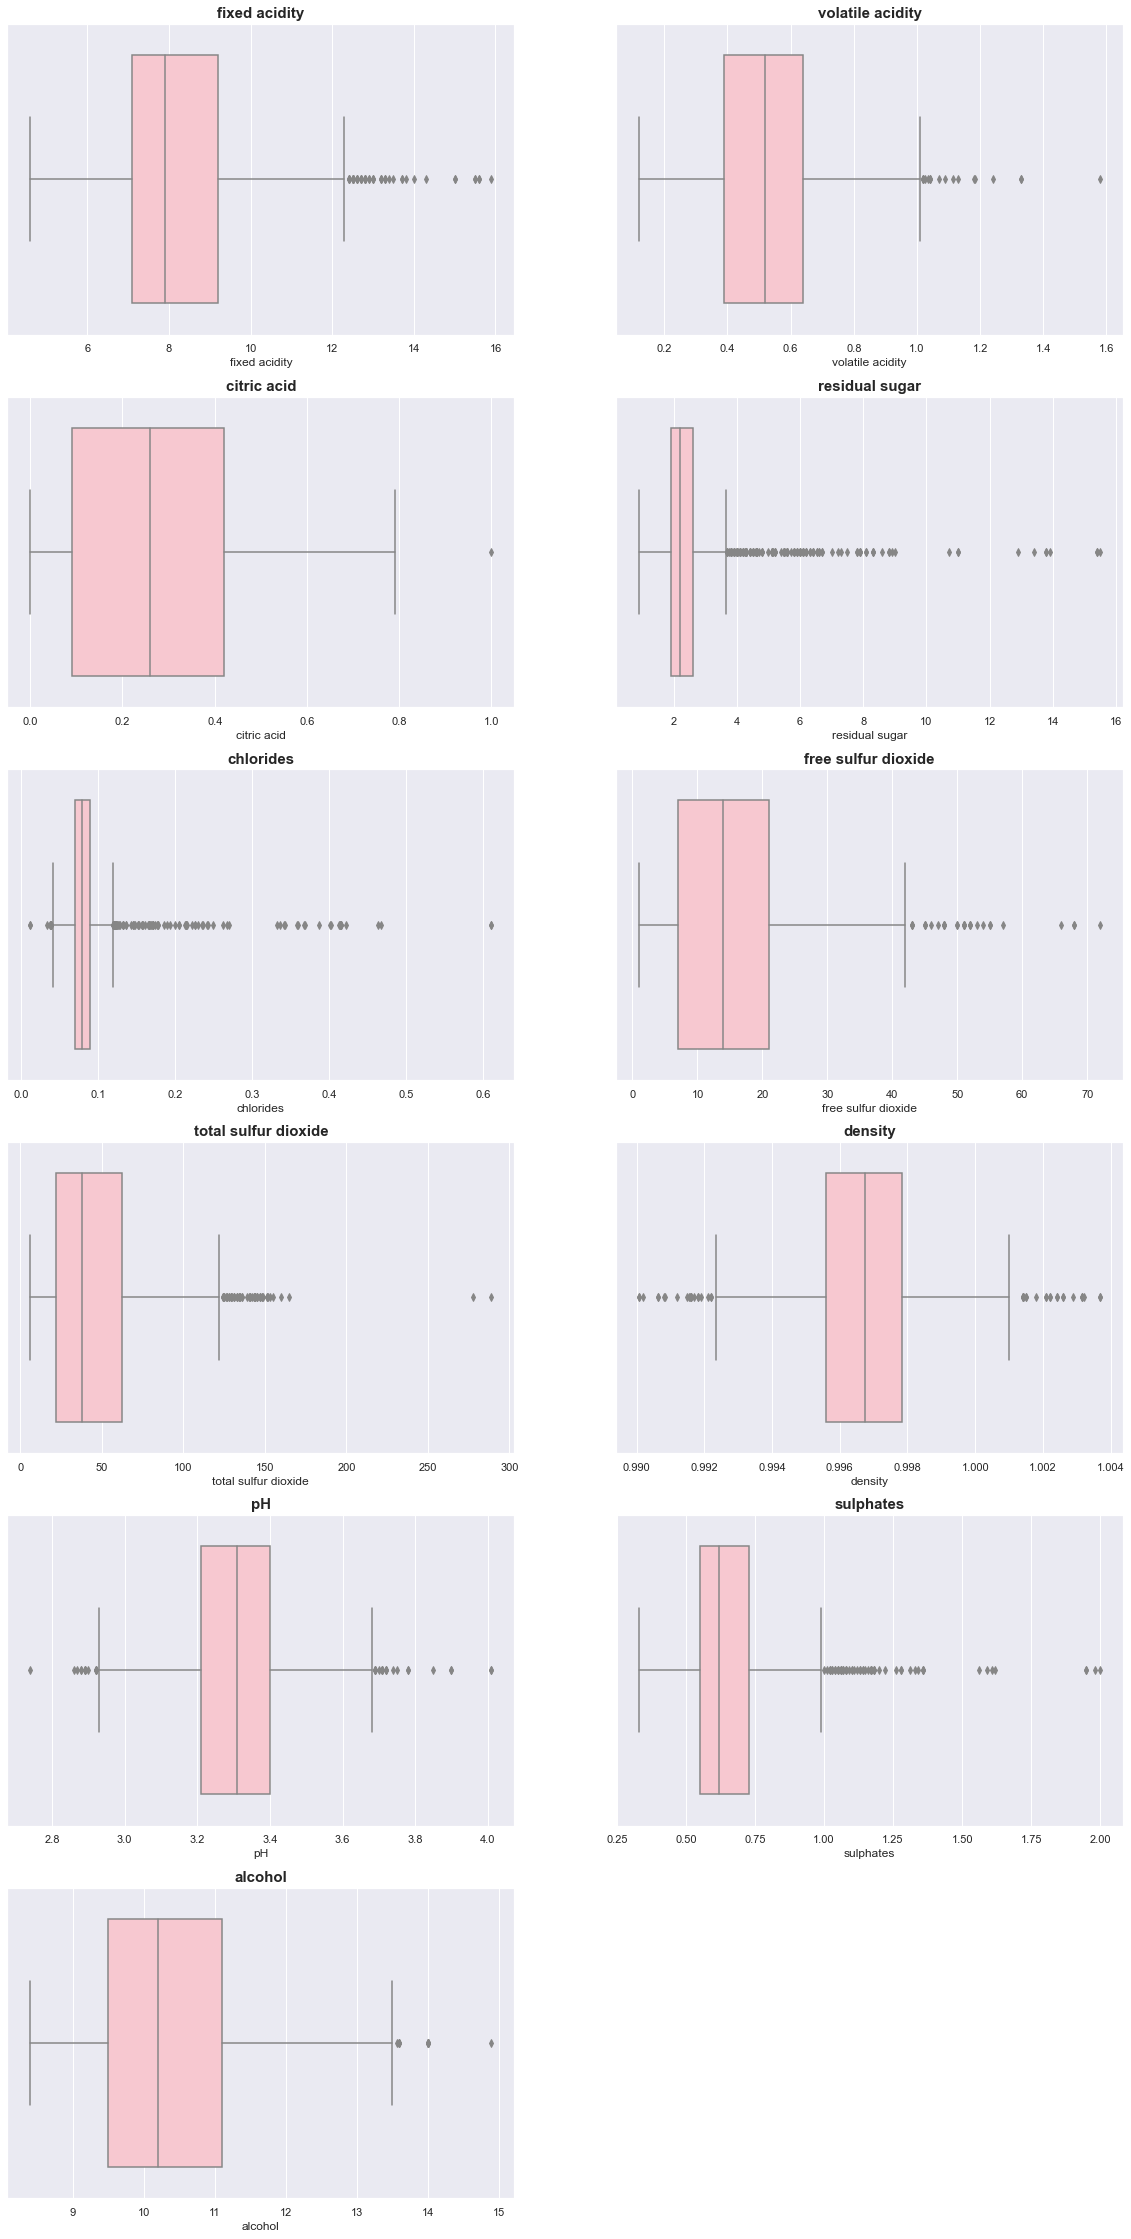

In [36]:
### Checking outliers in numerical features
plt.figure(figsize=(20,40))
for feature in enumerate(continuous_features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset,x=feature[1],color='pink')
    plt.title('{}'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

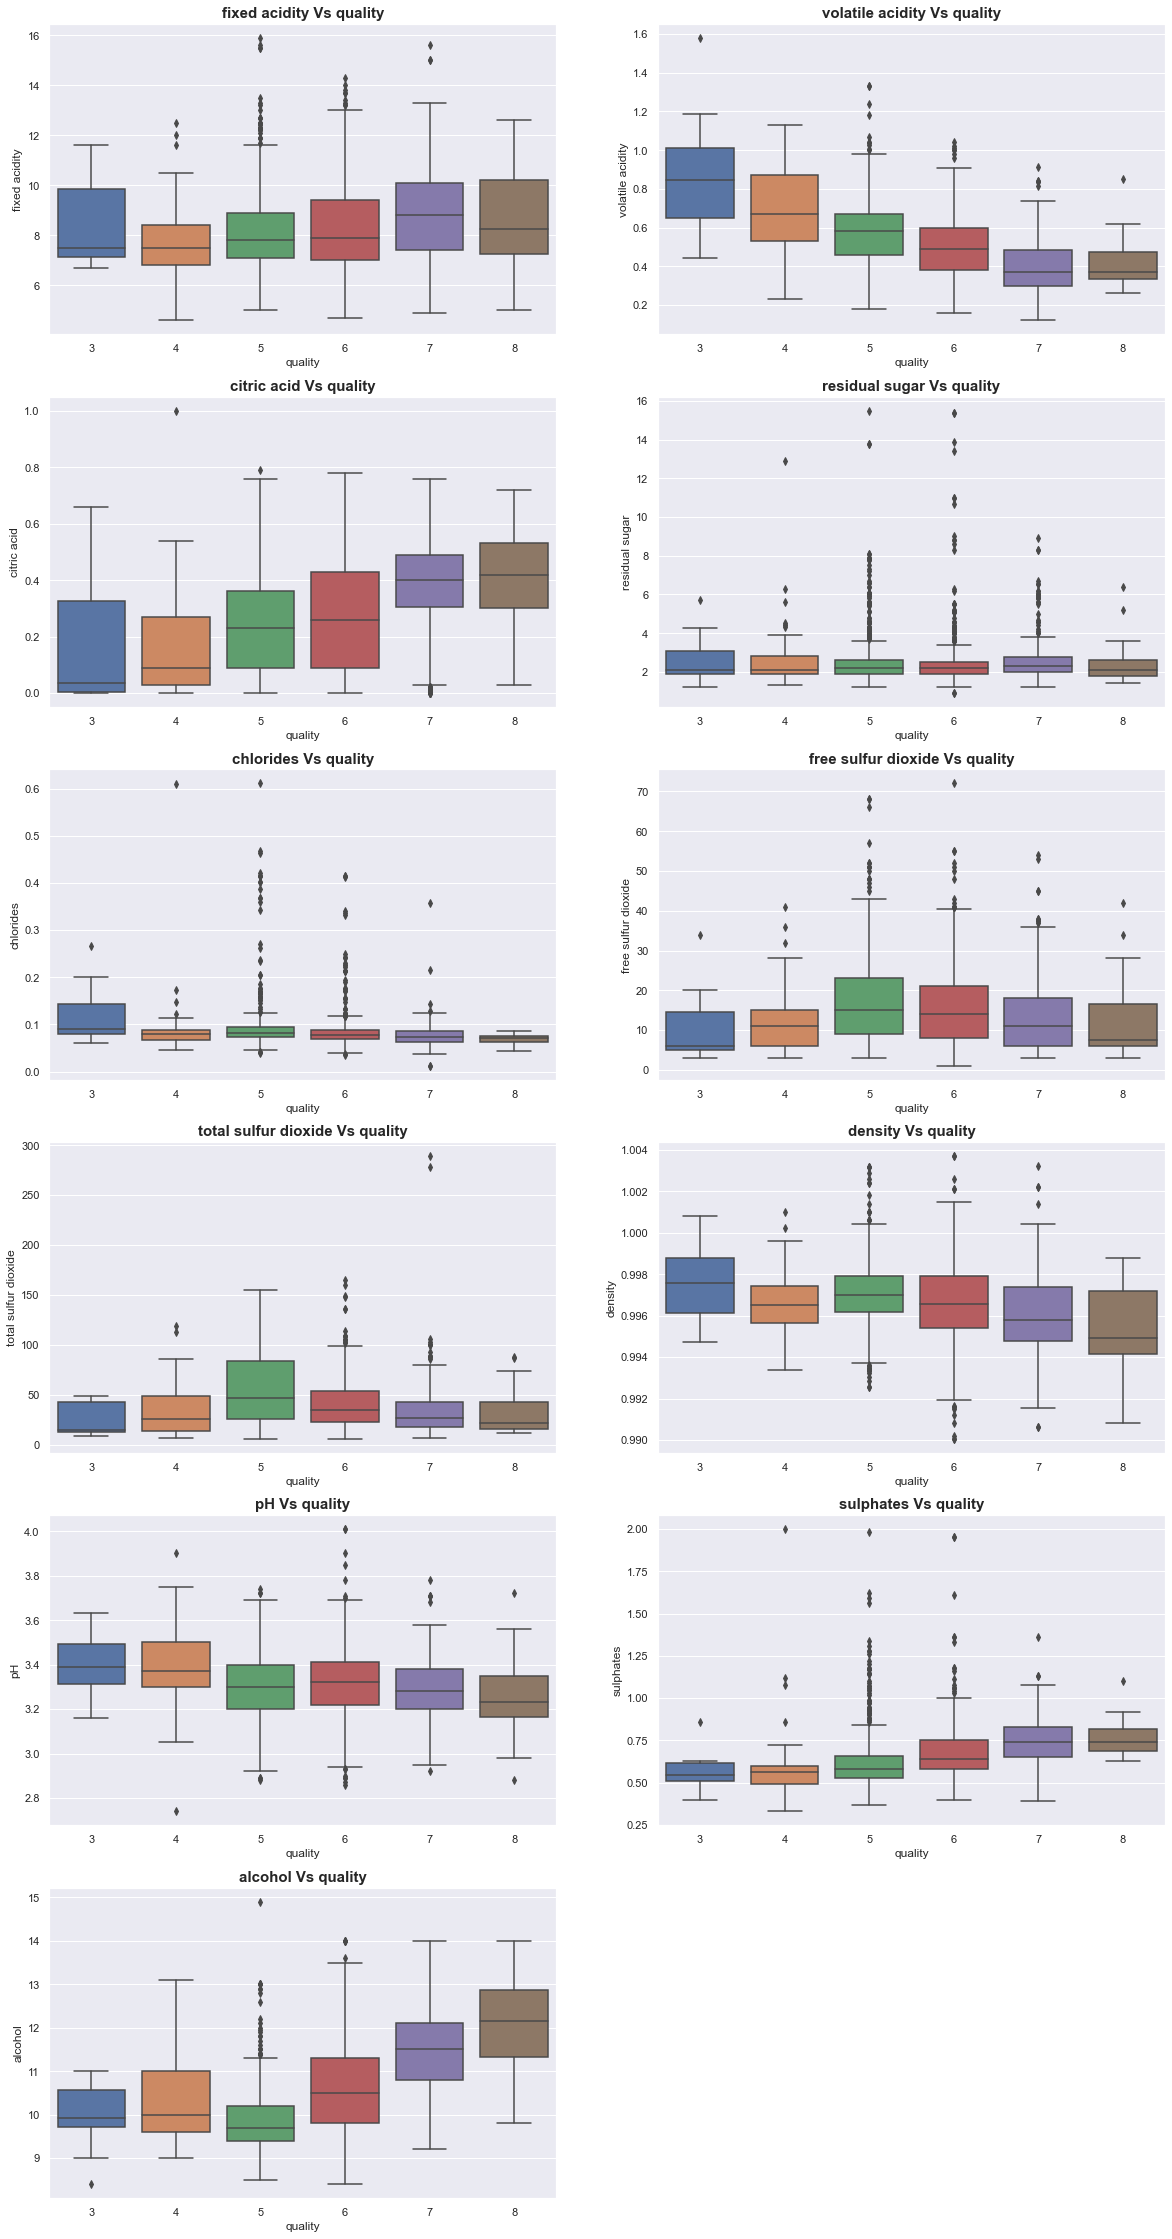

In [37]:
### getting outliers in features for each unique value in quality feature 
plt.figure(figsize=(20,40))
for feature in enumerate(continuous_features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset,y=feature[1],x='quality')
    plt.title('{} Vs quality'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

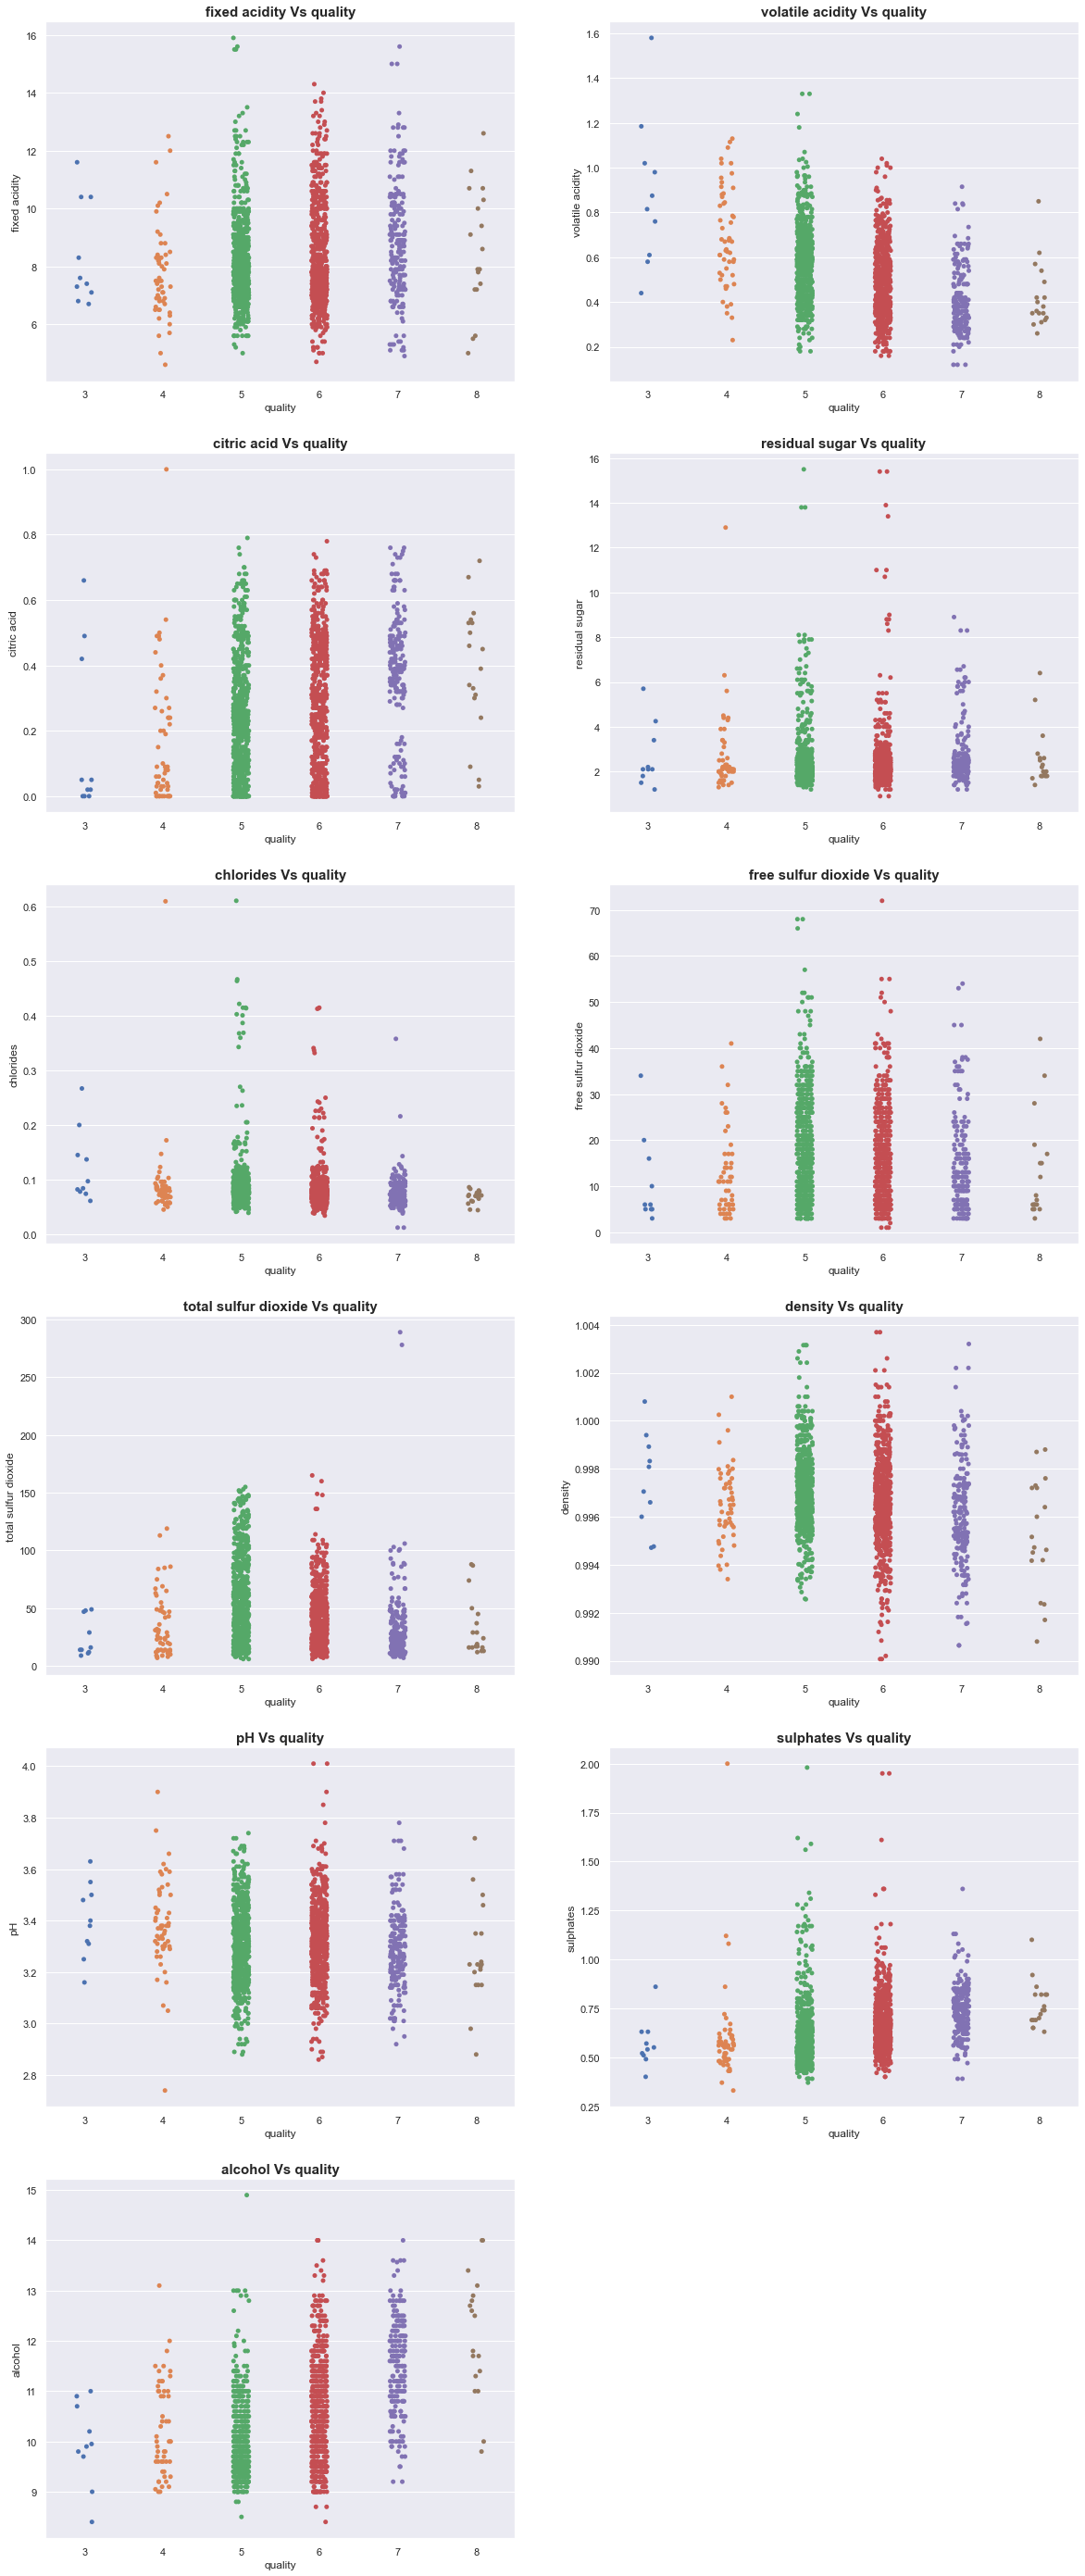

In [40]:
### visualising data scatter in each continuous feature with respect to quality
plt.figure(figsize=(20,50))
for feature in enumerate(continuous_features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.stripplot(data=dataset,y=feature[1],x='quality')
    plt.title('{} Vs quality'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

In [41]:
### getting correlation for all the features
corr=round(dataset.corr(),2)
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


<AxesSubplot:>

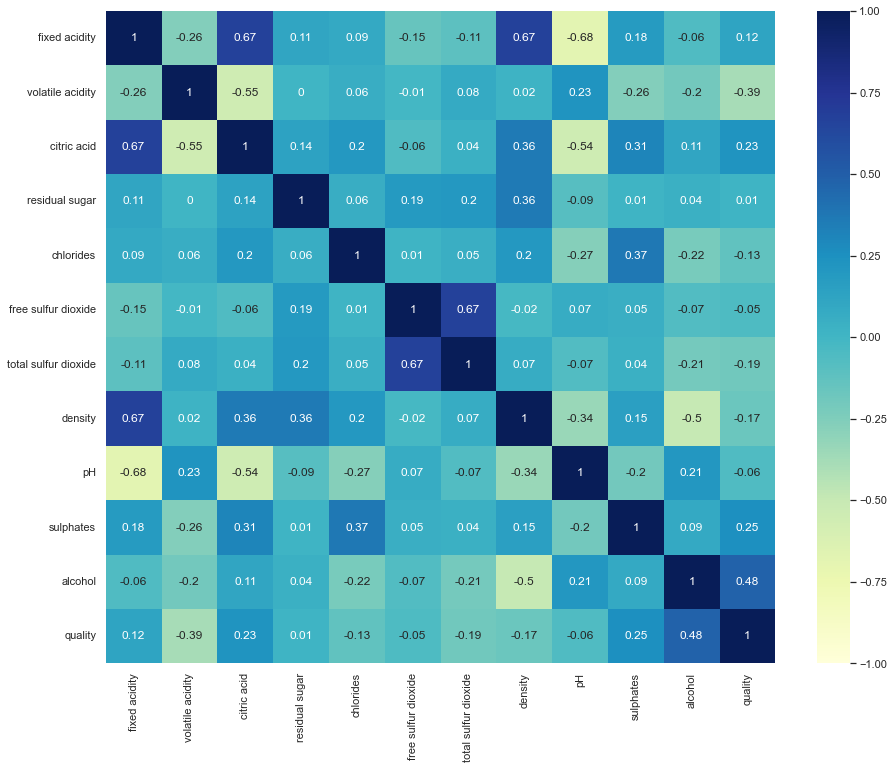

In [45]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(data=corr,annot=True,vmin=-1,vmax=1,cmap='YlGnBu')

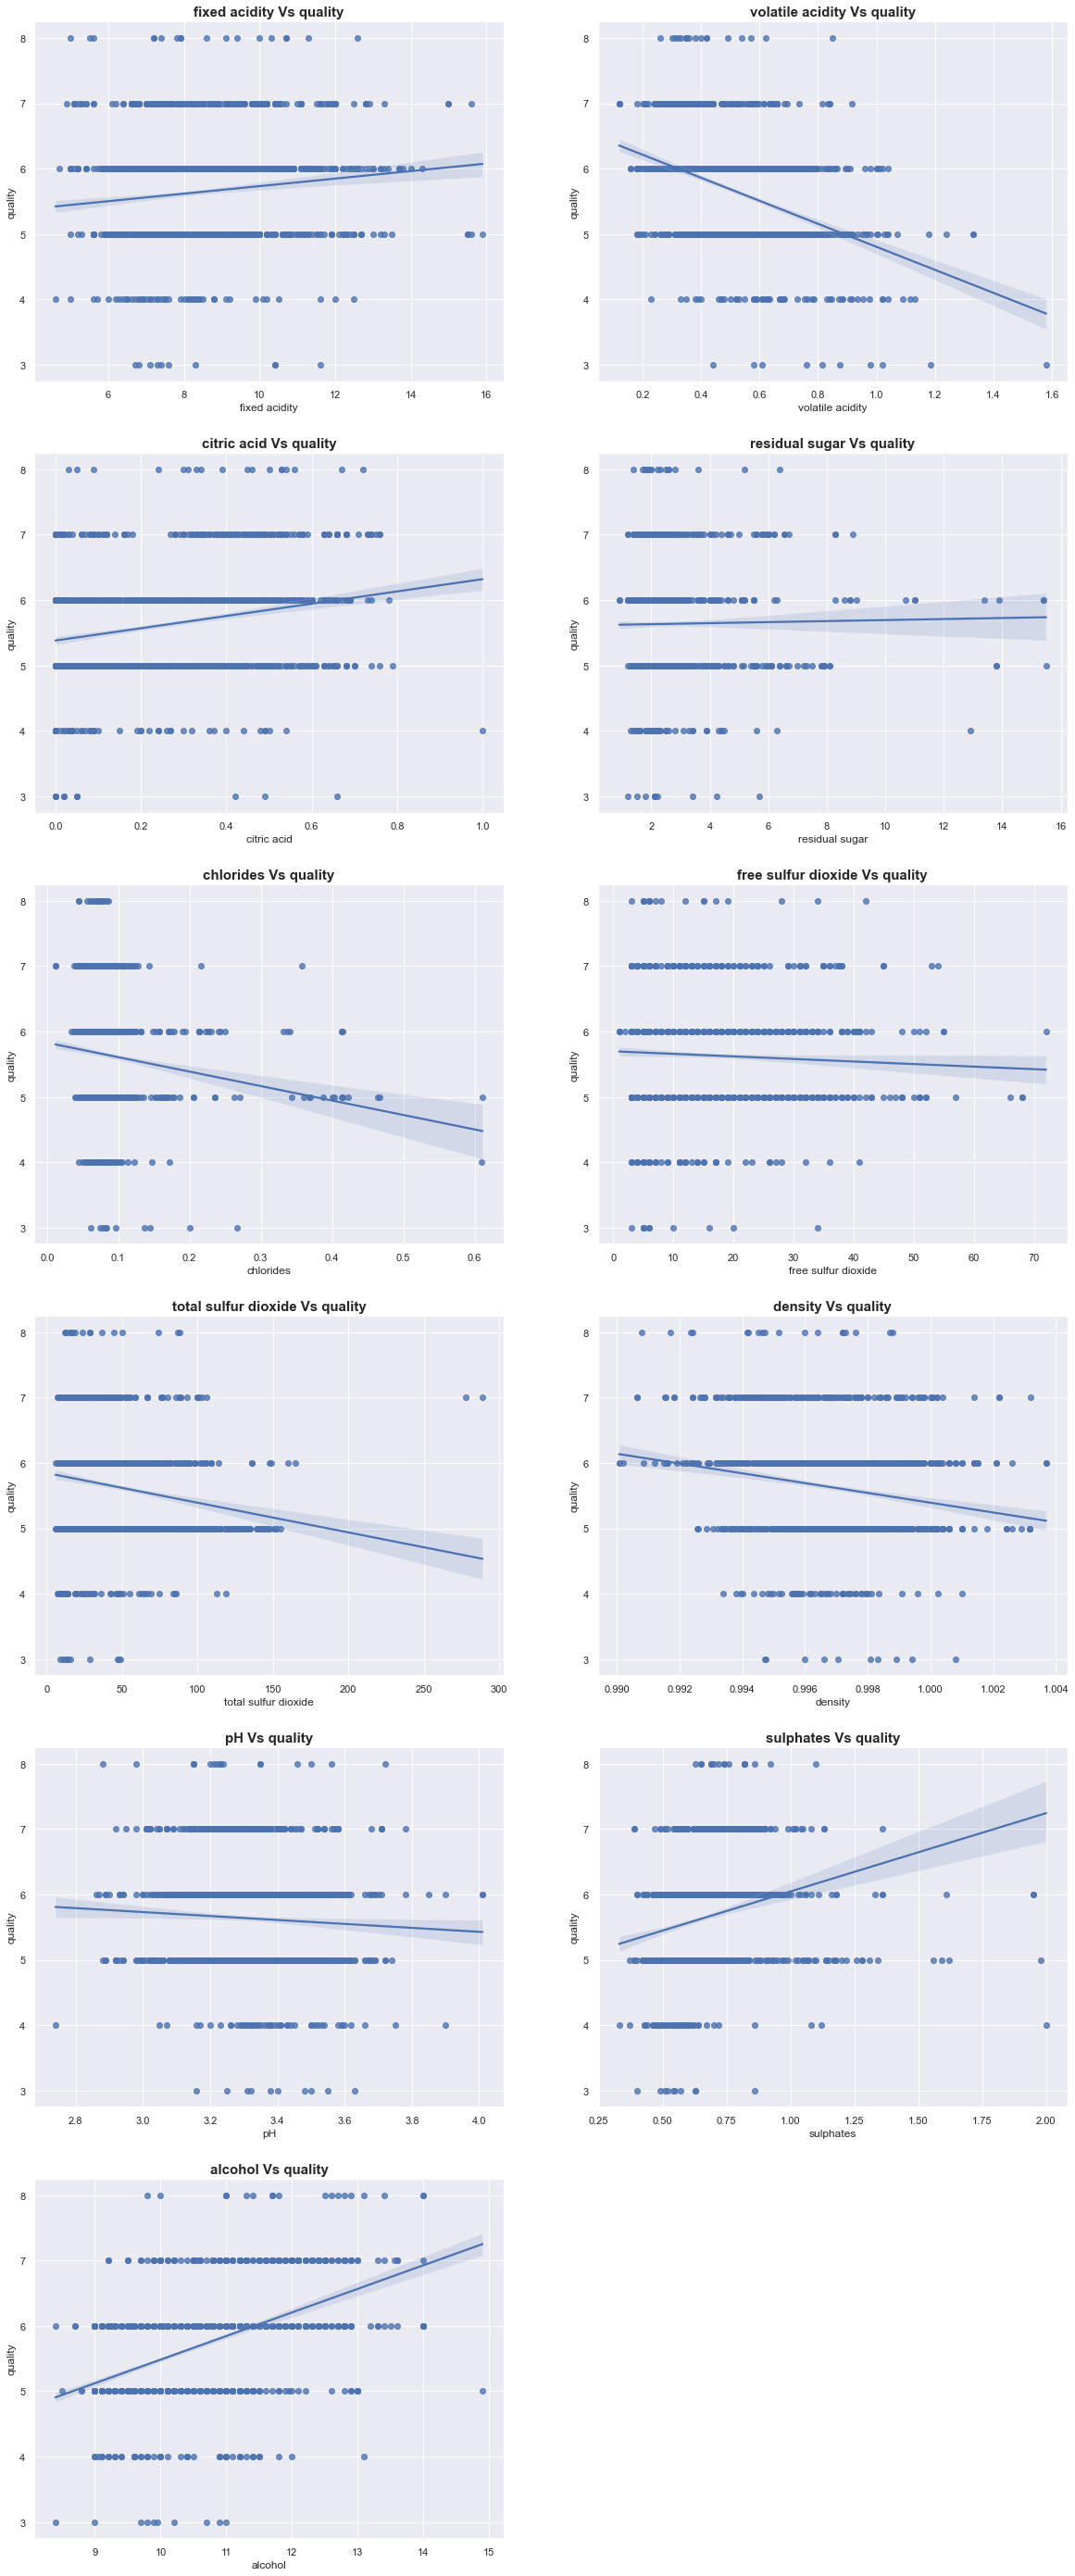

In [47]:
### plotting regplot for features vs quality
plt.figure(figsize=(20,50))
for feature in enumerate(continuous_features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.regplot(data=dataset,x=feature[1],y='quality')
    plt.xlabel(feature[1])
    plt.ylabel('quality')
    plt.title('{} Vs quality'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

# <span style='color:red'> 2.3 Splitting data into independent and dependent features </span>

In [59]:
### splitting data into independent dataframe and dependent series
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [60]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [61]:
### random state train test split will be same with all people using random_state=10
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [62]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
739,9.0,0.69,0.00,2.4,0.088,19.0,38.0,0.99900,3.35,0.60,9.3
663,10.1,0.28,0.46,1.8,0.050,5.0,13.0,0.99740,3.04,0.79,10.2
981,9.5,0.86,0.26,1.9,0.079,13.0,28.0,0.99712,3.25,0.62,10.0
463,8.1,0.66,0.70,2.2,0.098,25.0,129.0,0.99720,3.08,0.53,9.0
78,6.7,0.75,0.12,2.0,0.086,12.0,80.0,0.99580,3.38,0.52,10.1


In [63]:
y_train.head()

739    5
663    6
981    5
463    5
78     5
Name: quality, dtype: int64

In [64]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1518,7.4,0.47,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5
1246,7.4,0.74,0.07,1.7,0.086,15.0,48.0,0.99502,3.12,0.48,10.0
544,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4
1343,7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5
428,9.1,0.52,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3


In [65]:
y_test.head()

1518    5
1246    5
544     6
1343    6
428     5
Name: quality, dtype: int64

In [66]:
X_train.shape,y_train.shape

((1199, 11), (1199,))

In [67]:
X_test.shape,y_test.shape

((400, 11), (400,))

# <span style='color:red'> 2.4 Transforming data </span>

In [68]:
scaler=StandardScaler()
scaler

StandardScaler()

In [69]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.36628211,  0.9252263 , -1.41559084, ...,  0.2800327 ,
        -0.34099149, -1.03579592],
       [ 0.99530488, -1.38052243,  0.95277345, ..., -1.75526948,
         0.71993818, -0.17938734],
       [ 0.65220155,  1.88126845, -0.07695015, ..., -0.37651639,
        -0.22931468, -0.36970036],
       ...,
       [-0.77739563, -0.8181447 ,  1.10723199, ...,  0.54265233,
         0.60826138,  0.96249075],
       [ 0.93812099, -0.98685802,  1.00425963, ..., -0.50782621,
        -0.78769872,  1.5334298 ],
       [-0.77739563,  0.41908633,  0.12899457, ..., -0.04824185,
         2.84179753, -0.17938734]])

In [70]:
X_test=scaler.transform(X_test)
X_test

array([[-0.54866008, -0.31200473,  0.95277345, ...,  0.08306797,
        -0.17347628,  0.10608218],
       [-0.54866008,  1.20641516, -1.05518758, ..., -1.23003021,
        -1.01105233, -0.36970036],
       [ 3.39702815, -1.21180911,  2.3943865 , ..., -2.93705783,
         0.71993818, -1.89220449],
       ...,
       [-0.4914762 , -0.53695583,  0.12899457, ...,  0.87092688,
         0.32906936,  1.05764726],
       [-0.26274065, -0.14329141,  0.28345311, ..., -0.70479094,
        -0.6201835 , -0.8454829 ],
       [-0.37710842, -1.49299798, -0.07695015, ..., -1.03306548,
         0.71993818,  0.48670821]])

# <span style='color:red'> 2.5 Building SVC Model, training and performance of Model </span>

In [71]:
svc=SVC()
svc

SVC()

In [72]:
svc.fit(X_train,y_train)

SVC()

In [73]:
svc_pred=svc.predict(X_test)
svc_pred

array([6, 5, 6, 6, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 5, 6, 7, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 5, 5,
       5, 5, 7, 6, 7, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 5, 7, 6, 6, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6,
       7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6,
       6, 7, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7, 7, 7, 6, 5, 5, 6, 5,
       5, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 7, 5, 6, 5, 6, 6,

In [74]:
confusion_mat= confusion_matrix(y_test,svc_pred)
confusion_mat

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,  12,   3,   0,   0],
       [  0,   0, 124,  47,   1,   0],
       [  0,   0,  41, 105,   6,   0],
       [  0,   0,   2,  31,  17,   0],
       [  0,   0,   0,   6,   3,   0]], dtype=int64)

In [75]:
accuracy_sco= accuracy_score(y_test,svc_pred)
accuracy_sco

0.615

In [78]:
report=classification_report(y_test,svc_pred)
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.69      0.72      0.70       172
           6       0.54      0.69      0.61       152
           7       0.63      0.34      0.44        50
           8       0.00      0.00      0.00         9

    accuracy                           0.61       400
   macro avg       0.31      0.29      0.29       400
weighted avg       0.58      0.61      0.59       400



In [79]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [80]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [81]:
log_pred=log_reg.predict(X_test)
log_pred

array([6, 5, 5, 6, 5, 7, 6, 6, 5, 5, 6, 5, 5, 5, 5, 4, 5, 6, 5, 5, 5, 6,
       6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 7,
       5, 6, 5, 6, 7, 5, 6, 7, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5,
       6, 5, 7, 6, 7, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 7, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 5, 5,
       6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6,
       7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 7, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 3, 5, 5, 5, 5,
       6, 7, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 7, 6, 6, 6, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 5, 7, 6, 5, 6, 5, 6, 5, 6, 6,

In [82]:
report_log=classification_report(y_test,log_pred)
print(report_log)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.66      0.66      0.66       172
           6       0.49      0.64      0.55       152
           7       0.54      0.30      0.38        50
           8       0.00      0.00      0.00         9

    accuracy                           0.56       400
   macro avg       0.28      0.27      0.27       400
weighted avg       0.54      0.56      0.54       400



# <span style='color:red'> 2.6 Increasing performance of model (Hyper-parameter Tuning) </span>

In [84]:
### using different kernels to guage performanc of model for constant hyper-parameter C
kernels=['linear','rbf','poly','sigmoid']
for kernel in kernels:
    model=SVC(kernel=kernel,C= 1.0)
    model.fit(X_train,y_train)
    print('kernel {} has model accuracy {}'.format(kernel,model.score(X_test,y_test)))

kernel linear has model accuracy 0.5575
kernel rbf has model accuracy 0.615
kernel poly has model accuracy 0.5925
kernel sigmoid has model accuracy 0.4475


In [85]:
for degree in range(1,11):
    model=SVC(kernel='poly',degree=degree,C=100)
    model.fit(X_train,y_train)
    print(' for degree {} has model accuracy {}'.format(degree,model.score(X_test,y_test)))

 for degree 1 has model accuracy 0.5575
 for degree 2 has model accuracy 0.485
 for degree 3 has model accuracy 0.5525
 for degree 4 has model accuracy 0.575
 for degree 5 has model accuracy 0.5875
 for degree 6 has model accuracy 0.5775
 for degree 7 has model accuracy 0.57
 for degree 8 has model accuracy 0.5925
 for degree 9 has model accuracy 0.615
 for degree 10 has model accuracy 0.53


In [87]:
#### using gridsearchcv to increase model efficiency by combining above parameters
param_grid={ 'C':[i for i in range(1,100,10)], 'kernel':['linear','rbf','poly','sigmoid'],'degree':[1,2,3,4,5,6,7]}
grid=GridSearchCV(SVC(),param_grid=param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [89]:
### getting best parameters after gridsearchCV
print('best parameters {} for optimal accuracy'.format(grid.best_params_))

best parameters {'C': 11, 'degree': 1, 'kernel': 'rbf'} for optimal accuracy


In [90]:
### getting best accuracy after gridsearchCV
print(' best accuracy {}'.format(grid.score(X_test,y_test)))

 best accuracy 0.6225


In [94]:
### Accuracy_score comparision
print('Accuracy of SVC without hyperparameter tunning is {}\nAccuracy of SVC with hyperparameter tunning {}\nIncrease in accuracy {}'.format(
accuracy_score(y_test,svc_pred)*100, round(grid.score(X_test,y_test)*100,2),round(grid.score(X_test,y_test)-accuracy_score(y_test,svc_pred),5)*100))

Accuracy of SVC without hyperparameter tunning is 61.5
Accuracy of SVC with hyperparameter tunning 62.25
Increase in accuracy 0.75
